In [ ]:
from sklearn.utils.fixes import sklearn
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import pandas as pd
from sklearn.datasets import make_regression, make_classification, make_blobs
import matplotlib.pyplot as plt
import numpy as np

(80, 1)
(20, 1)
(80,)
(20,)


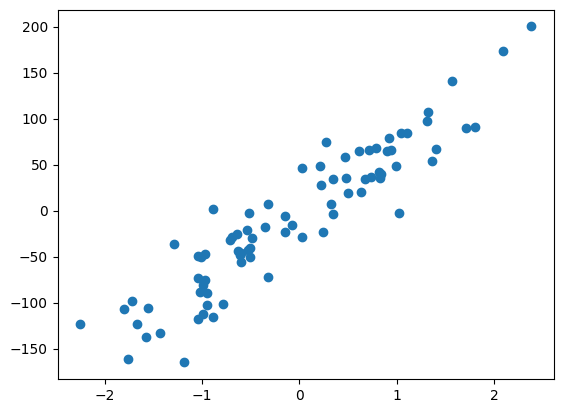

In [ ]:
X, y = make_regression(n_samples=100, n_features=1, noise=30, random_state=50042)

# hace 100 muestras con una sola columna,noise es la dispersion de la regresion,random state fija un numero para que lo aleatorio sea repetible
# print("X",X[:10],X.shape)
# print("y",y[:10],y.shape)
train_x=X[:-20]
test_x=X[-20:]

train_y=y[:-20]
test_y=y[-20:]
plt.scatter(train_x,train_y)


print(train_x.shape)
print(test_x.shape)
print(train_y.shape)
print(test_y.shape)

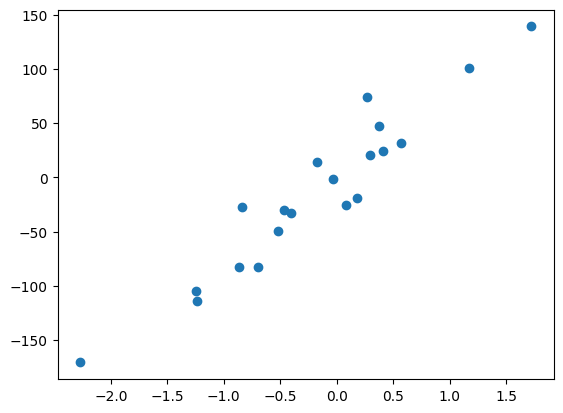

In [ ]:
plt.scatter(test_x,test_y)

In [ ]:
# params is an array of 2 positions where 1st position is m and second position is
params=60

def fn(data, params):
  return params*data

fn(train_x[:3], params)

array([[ 1.44970452],
       [-6.66155793],
       [20.16126916]])

0 -30
error 1494547.31386609 params -30
1 -28
error 1450028.2895012759 params -28
2 -26
error 1406224.4599541207 params -26
3 -24
error 1363135.825224624 params -24
4 -22
error 1320762.385312786 params -22
5 -20
error 1279104.1402186067 params -20
6 -18
error 1238161.089942086 params -18
7 -16
error 1197933.2344832239 params -16
8 -14
error 1158420.5738420207 params -14
9 -12
error 1119623.108018476 params -12
10 -10
error 1081540.8370125904 params -10
11 -8
error 1044173.7608243631 params -8
12 -6
error 1007521.8794537944 params -6
13 -4
error 971585.1929008847 params -4
14 -2
error 936363.7011656333 params -2
15 0
error 901857.4042480408 params 0
16 2
error 868066.3021481067 params 2
17 4
error 834990.3948658316 params 4
18 6
error 802629.6824012151 params 6
19 8
error 770984.1647542572 params 8
20 10
error 740053.8419249579 params 10
21 12
error 709838.7139133175 params 12
22 14
error 680338.7807193357 params 14
23 16
error 651554.0423430125 params 16
24 18
error 623484.498784348 pa

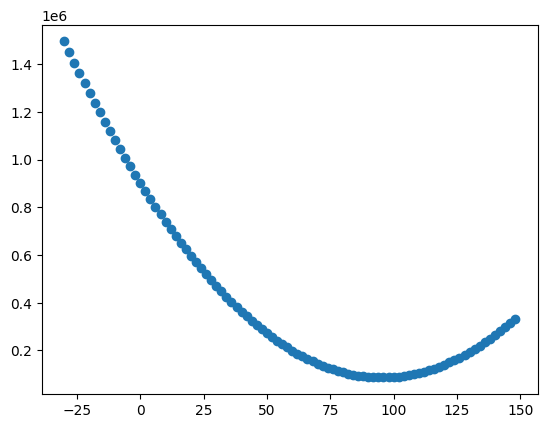

min 63 86624.25777019755
min idx 63
computing with params 96.0  with error  86624.25777019755


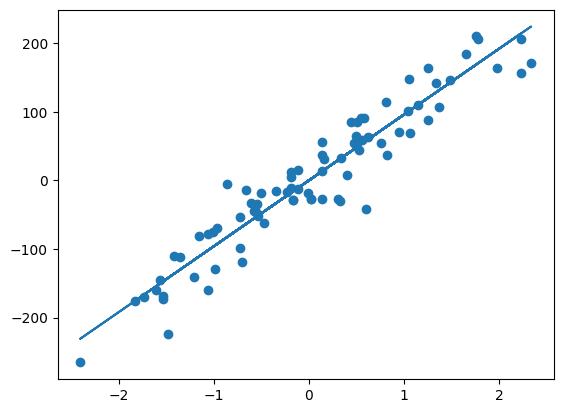

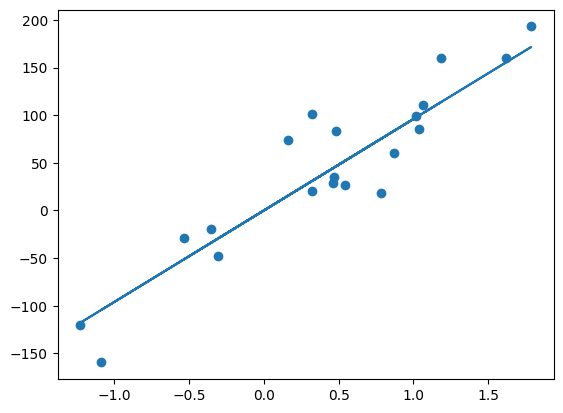

u 21524.63818038697
v 152090.75180371408
self_computed score (determination coeff) 0.8584750359563853


In [ ]:
params=60

errors=[]
for i,m in enumerate(range(-30,150,2)):
  print(i,m)
  params=m
  train_y_pred=fn(train_x,params)

  error=np.average(((train_y.reshape((-1,1)) - train_y_pred)**2).sum())

  errors.append([i, error, params])

  # plt.scatter(train_x,train_y)
  # plt.scatter(train_x, train_y_pred)
  # plt.show()

  print("error",error, "params", params)

print(errors)
errors=np.array(errors)
plt.scatter(errors[:,2],errors[:,1])
plt.show()
print("min",errors[:,1].argmin(),errors[:,1].min())

idx=errors[:,1].argmin()    # obtiene el indice cuyo error es el menor registrado
print("min idx", idx)
params=errors[idx,2]
print("computing with params", params, " with error ", errors[idx,1])
train_y_pred=fn(train_x,params)

plt.scatter(train_x,train_y)
plt.plot(train_x, train_y_pred)
plt.show()

test_y_pred=fn(test_x,params)
plt.scatter(test_x,test_y)
plt.plot(test_x, test_y_pred)
plt.show()

u=((test_y.reshape((-1,1)) - test_y_pred)**2).sum()
print("u",u)

v=((test_y.reshape((-1,1)) - test_y.mean())**2).sum()
print("v",v)

print("self_computed score (determination coeff)", 1-(u/v))

In [ ]:
def gradient(data, target, params):
  return -1*2*data*(target-data*params)

grad -213.42937192977016
error 901857.4042480408 params 2.1342937192977014
grad -208.6592600316353
error 865827.5148104334 params 4.2208863196140545
grad -203.9957593619128
error 831399.0590840772 params 6.260843913233183
grad -199.4364871769132
error 798501.054375752 params 8.255208785002315
grad -194.97911398688265
error 767065.6598877788 params 10.204999924871142
grad -190.6213623657858
error 737028.0377462963 params 12.111213548529001
grad -186.36100578769063
error 708326.2201743292 params 13.974823606405907
grad -182.19586748915896
error 680900.9825380052 params 15.796782281297498
grad -178.1238193570629
error 654695.7220062702 params 17.578020474868126
grad -174.14278084125849
error 629656.3415759413 params 19.31944828328071
grad -170.25071789156044
error 605731.1392249033 params 21.021955462196313
grad -166.44564191847567
error 582870.701966734 params 22.68641188138107
grad -162.72560877716427
error 561027.8045900739 params 24.31366796915271
grad -159.0887177741086
error 540157.

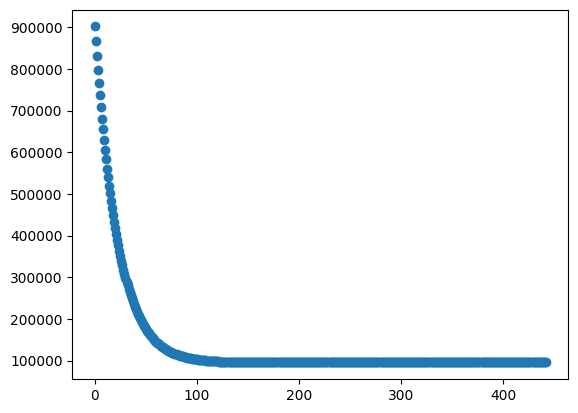

min 199 95619.82891778306
computing with params 94.43191997760242  with error  95619.82891778306


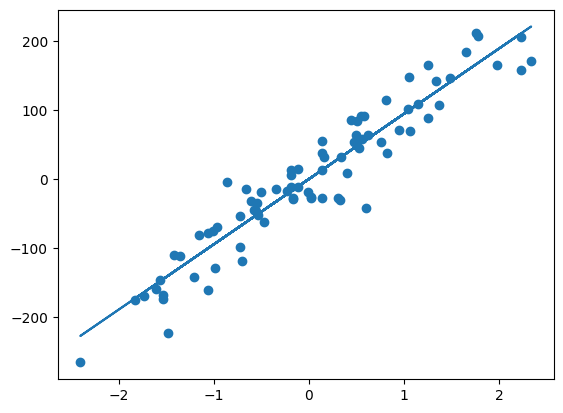

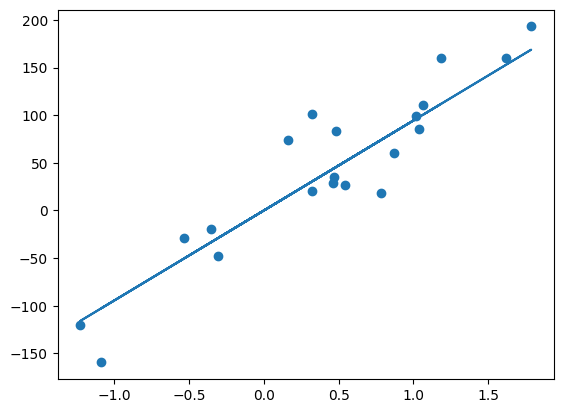

u 21889.609031162552
v 152090.75180371408
self_computed score (determination coeff) 0.8560753446770193


In [ ]:
params=0
lr=0.01
alpha=1
errors=[]
epsilon=0.01
i=0
grad=-1
while -1*grad>epsilon:
# for i in range(1000):

  train_y_pred=fn(train_x,params)

  error=np.average(((train_y.reshape((-1,1)) - train_y_pred)**2).sum())+alpha*(params**2)

  errors.append([i, error, params])

  grad=gradient(train_x.reshape((-1,1)),train_y.reshape((-1,1)), params).mean()
  print("grad", grad)
  params=params-lr*grad

  # plt.scatter(train_x,train_y)
  # plt.scatter(train_x, train_y_pred)
  # plt.show()

  print("error",error, "params", params)
  i+=1

print(errors)
errors=np.array(errors)
plt.scatter(errors[:,0],errors[:,1])
plt.show()
print("min",errors[:,1].argmin(),errors[:,1].min())

idx=errors[:,1].argmin()
params=errors[idx,2]
print("computing with params", params, " with error ", errors[idx,1])
train_y_pred=fn(train_x,params)

plt.scatter(train_x,train_y)
plt.plot(train_x, train_y_pred)
plt.show()

test_y_pred=fn(test_x,params)
plt.scatter(test_x,test_y)
plt.plot(test_x, test_y_pred)
plt.show()

u=((test_y.reshape((-1,1)) - test_y_pred)**2).sum()
print("u",u)

v=((test_y.reshape((-1,1)) - test_y.mean())**2).sum()
print("v",v)

print("self_computed score (determination coeff)", 1-(u/v))

Coefficients: 
 [95.52332895]
Intercept: 
 -0.984523784769785
Mean squared error: 1088.13
Coefficient of determination: 0.86
u 21762.549627883185
v 152090.75180371408
self_computed score (determination coeff) 0.8569107630162182


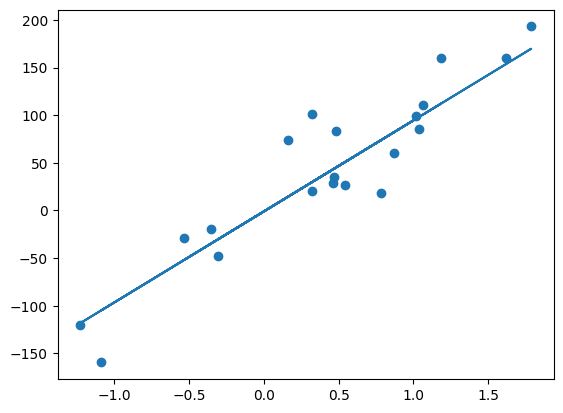

In [ ]:
#encontrar la correlacion de los datos
lr_model=linear_model.LinearRegression()
#lr_model=linear_model.Ridge()

lr_model.fit(train_x, train_y)

test_y_predict = lr_model.predict(test_x)

plt.scatter(test_x,test_y)
plt.plot(test_x, test_y_predict)

# The coefficients
print("Coefficients: \n", lr_model.coef_)

# The intercept
print("Intercept: \n", lr_model.intercept_)

# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(test_y, test_y_predict))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(test_y, test_y_predict))

u=((test_y - test_y_predict)**2).sum()
print("u",u)

v=((test_y - test_y.mean())**2).sum()
print("v",v)

print("self_computed score (determination coeff)", 1-(u/v))


In [ ]:
from sklearn.feature_selection import f_regression

f_regression(train_x, train_y)

(array([291.75607272]), array([4.44120673e-28]))

In [ ]:
import statsmodels.api as sm

#fit linear regression model
model = sm.OLS(train_y, train_x).fit()

#view model summary
print(model.summary())


                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.795
Model:                            OLS   Adj. R-squared (uncentered):              0.793
Method:                 Least Squares   F-statistic:                              306.6
Date:                Mon, 13 Nov 2023   Prob (F-statistic):                    6.38e-29
Time:                        22:01:35   Log-Likelihood:                         -380.91
No. Observations:                  80   AIC:                                      763.8
Df Residuals:                      79   BIC:                                      766.2
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

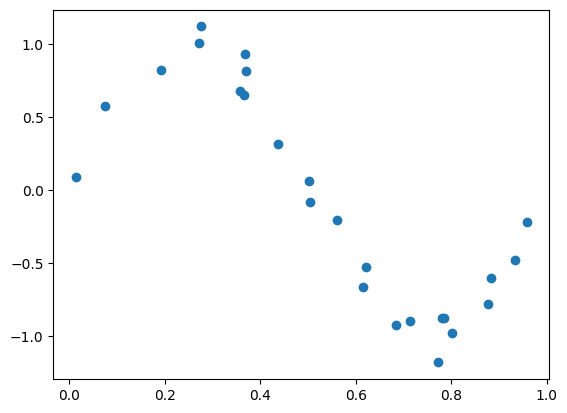

In [ ]:
def func(x,a):
    return np.sin(a * np.pi * x)


size = 25
rng = np.random.RandomState(1234)
train_x = rng.uniform(0.0, 1.0, size)
train_y = func(train_x,2) + rng.normal(scale=0.1, size=size)
test_x = np.linspace(0.0, 1.0, 100)

plt.scatter(train_x,train_y)

Coefficients: 
 [[-2.17079703]]
Intercept: 
 [1.10370748]


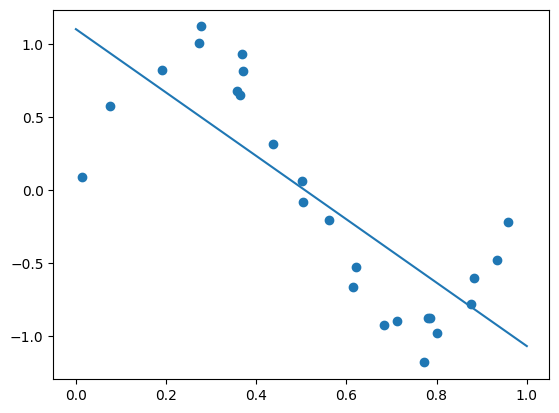

In [ ]:
#encontrar la correlacion de los datos
lr_model=linear_model.LinearRegression()

lr_model.fit(train_x.reshape(-1,1), train_y.reshape(-1,1))

test_y_predict = lr_model.predict(test_x.reshape(-1,1))

plt.scatter(train_x,train_y)
plt.plot(test_x, test_y_predict)

# The coefficients
print("Coefficients: \n", lr_model.coef_)

# The intercept
print("Intercept: \n", lr_model.intercept_)


Coefficients: 
 [[-2.17079703]]
Intercept: 
 [1.10370748]
(array([1.98441042]), array([[0.00026286]]))


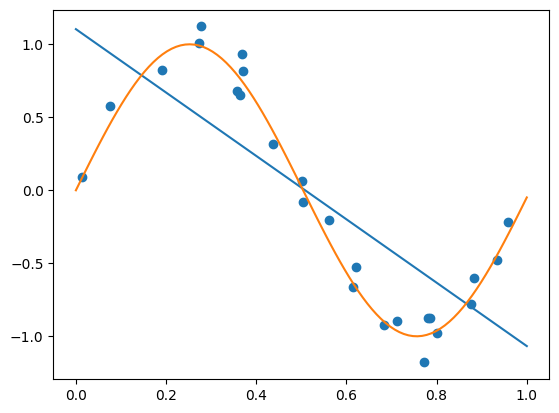

In [ ]:
#encontrar la correlacion de los datos
lr_model=linear_model.LinearRegression()

lr_model.fit(train_x.reshape(-1,1), train_y.reshape(-1,1))

test_y_predict = lr_model.predict(test_x.reshape(-1,1))

plt.scatter(train_x,train_y)
plt.plot(test_x, test_y_predict)

# The coefficients
print("Coefficients: \n", lr_model.coef_)

# The intercept
print("Intercept: \n", lr_model.intercept_)

#----Polynomial Regression

from scipy.optimize import curve_fit

popt=curve_fit(func, train_x, train_y)
print(popt)

test_y_predict = func(test_x,popt[0])

plt.plot(test_x, test_y_predict)

<ipython-input-2-1c49a0a9f470>:10: RuntimeWarning: divide by zero encountered in log
  error = -np.sum(np.log(probabilidades))


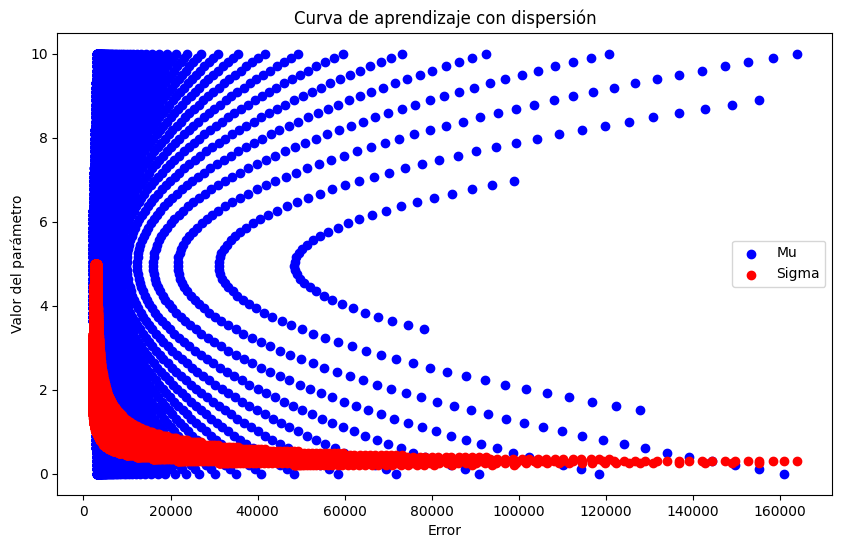

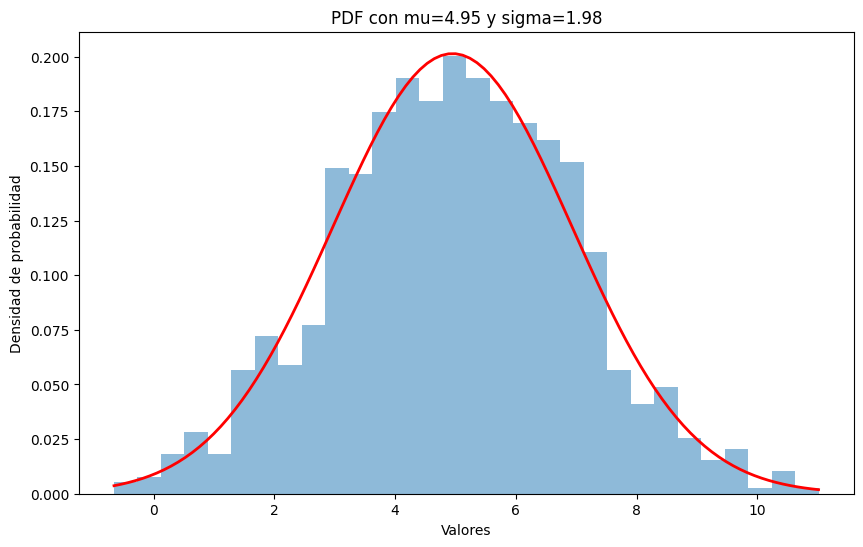

Mejor mu: 4.95
Mejor sigma: 1.98
Mejor error: 2098.47


In [2]:
# Importa las bibliotecas necesarias
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Define la función para calcular el error
def calcular_error(datos, mu, sigma):
  distribucion = norm(mu, sigma)
  probabilidades = distribucion.pdf(datos)
  error = -np.sum(np.log(probabilidades))
  return error

# Define los datos de ejemplo
datos = np.random.normal(loc=5, scale=2, size=1000)

# Define los rangos de mu y sigma para la prueba y error
mu_rango = np.linspace(0, 10, 100)
sigma_rango = np.linspace(0.1, 5, 100)

# Inicializa las variables para el mejor error y los mejores parámetros
mejor_error = np.inf
mejor_mu = None
mejor_sigma = None

# Bucle de entrenamiento para encontrar los mejores parámetros
errores = []
for mu in mu_rango:
  for sigma in sigma_rango:
    error = calcular_error(datos, mu, sigma)
    errores.append([mu, sigma, error])
    if error < mejor_error:
      mejor_error = error
      mejor_mu = mu
      mejor_sigma = sigma

# Convierte la lista de errores a un array de NumPy
errores = np.array(errores)

# Grafica la curva de errores
plt.figure(figsize=(10, 6))
plt.scatter(errores[:, 2], errores[:, 0], c='blue', label='Mu')
plt.scatter(errores[:, 2], errores[:, 1], c='red', label='Sigma')
plt.xlabel('Error')
plt.ylabel('Valor del parámetro')
plt.title('Curva de aprendizaje con dispersión')
plt.legend()
plt.show()

# Grafica la PDF con los mejores parámetros
x = np.linspace(min(datos), max(datos), 100)
distribucion_mejor = norm(mejor_mu, mejor_sigma)
pdf_mejor = distribucion_mejor.pdf(x)

plt.figure(figsize=(10, 6))
plt.hist(datos, bins=30, density=True, alpha=0.5)
plt.plot(x, pdf_mejor, 'r-', linewidth=2)
plt.xlabel('Valores')
plt.ylabel('Densidad de probabilidad')
plt.title(f'PDF con mu={mejor_mu:.2f} y sigma={mejor_sigma:.2f}')
plt.show()

print(f'Mejor mu: {mejor_mu:.2f}')
print(f'Mejor sigma: {mejor_sigma:.2f}')
print(f'Mejor error: {mejor_error:.2f}')